In [215]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, LabelEncoder
## for Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [38]:
data = pd.read_csv('https://raw.githubusercontent.com/ManonYa09/Statistics_with_Python_G6/main/Dataset/5.%20insurance.csv')

In [47]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [51]:
df = data

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Feature Engineering

In [53]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [61]:
 df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [123]:
yes_no_column = []
cat_column = []
num_column = []

for column in df.columns:
    if column=='charges':
        continue
    elif df[column].nunique()==2:
            yes_no_column.append(column)
    elif df[column].nunique()<=4:
        cat_column.append(column)
    else:
        num_column.append(column)    

In [125]:
num_column

['age', 'bmi', 'children']

In [127]:
yes_no_column

['sex', 'smoker']

In [133]:
ColumnTransformer([
    ('twounique', OrdinalEncoder(), yes_no_column)
]).fit_transform(df)

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 1.]])

In [179]:
Processing = ColumnTransformer([
    ('scaling', StandardScaler(), num_column),
    ('onehot', OneHotEncoder(), cat_column),
    ('two_unique', OrdinalEncoder(), yes_no_column)
])

traning_pipeline = Pipeline([
 
    
    
    ('preprocessing', Processing),
    ('model', LinearRegression())
])

In [181]:
# Processing.fit_transform(x_train)

In [183]:
from sklearn.model_selection import train_test_split
x ,y = df.drop(columns= 'charges'), df['charges']
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [185]:
traning_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('scaling', StandardScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('onehot', OneHotEncoder(),
                                                  ['region']),
                                                 ('two_unique',
                                                  OrdinalEncoder(),
                                                  ['sex', 'smoker'])])),
                ('model', LinearRegression())])

In [187]:
x_test

,age,sex,bmi,children,smoker,region
1117,25,male,33.330,2,yes,southeast
900,49,male,22.515,0,no,northeast
1311,33,female,26.695,0,no,northwest
985,44,female,25.800,1,no,southwest
1282,18,female,21.660,0,yes,northeast
...,...,...,...,...,...,...
1128,34,male,32.800,1,no,southwest
187,30,female,30.900,3,no,southwest
68,40,female,36.190,0,no,southeast
197,45,female,28.600,2,no,southeast


In [189]:
y_prediction  = traning_pipeline.predict(x_test)

In [191]:
mean_absolute_error(y_test, y_prediction)

3893.09875764179

In [193]:
mean_squared_error(y_test, y_prediction)

31325503.369722564

In [223]:
x_test.shape[1]

6

In [225]:
Adj_r2 = 1 - (1-r2) * (len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

In [231]:
r2 = r2_score(y_test, y_prediction)

In [227]:
Adj_r2

0.7717089523520829

In [195]:
mean_squared_error(y_test, y_prediction)**(1/2)

5596.919096228082

In [ ]:
sse < sst: 

In [219]:
/100

0.01

In [221]:
1-0.01

0.99

In [ ]:
r2_score(y_test, y_prediction)= 1-sse/sst

In [217]:
r2_score(y_test, y_prediction)

0.7758099891361773

In [197]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [199]:
mean_absolute_error(y_test, y_prediction)

3893.09875764179

In [213]:
1/10

0.1

In [ ]:
MAE
MSE
rmse

In [ ]:
x1 
r2 = 90, ar2 = 90
x1, x2
r2=  91
ar2 = 91
x1, ..., x100 = 99.8
ar2 = 97, 

x1, --.x100
r2, ar2 = 99.8

In [ ]:
sst = (yi-y_prediction)**2/
    sum(yi - y_mean)**2

In [209]:
df['charges'].mean()

13270.422265141257

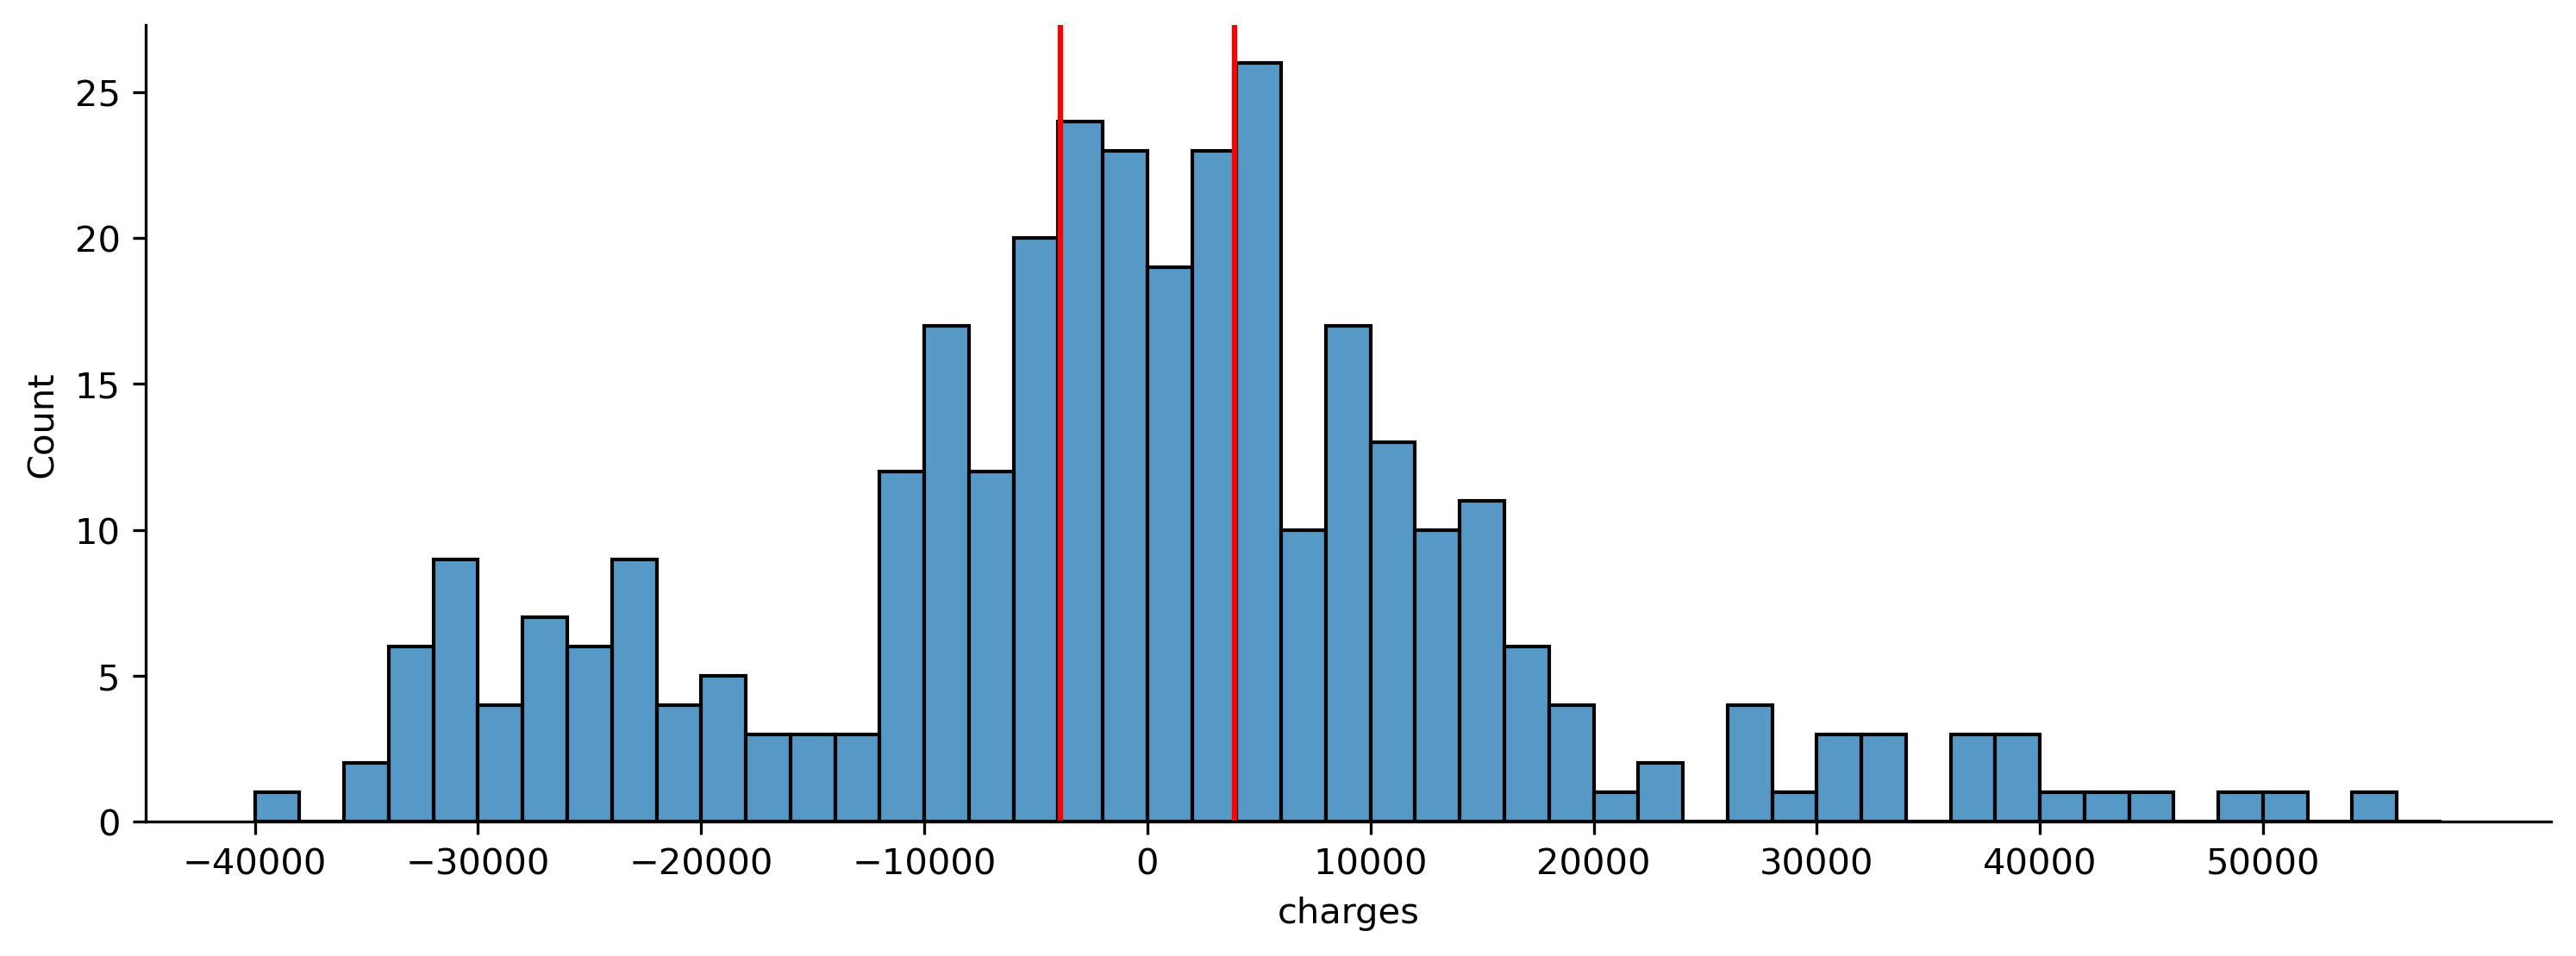

In [205]:
fig, ax = plt.subplots(figsize = (12, 4), dpi = 300)
sns.histplot(x = error, bins = np.arange(-40000, 60000, 10000/5))
ax.axvline(x = mean_absolute_error(y_test, y_prediction), color = 'r')
ax.axvline(x = -mean_absolute_error(y_test, y_prediction), color = 'r')
ax.set_xticks(np.arange(-40000, 60000, 10000))
sns.despine()

In [16]:
error = abs(2.5-2.1)
error1 = abs(3.7-3.9)

In [18]:
error + error1

0.5999999999999996

In [10]:
error1

-0.19999999999999973

In [ ]:
1 